<a href="https://colab.research.google.com/github/SergeiRaik/hy-research/blob/main/polyplex-analysis/nanodrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!wget https://github.com/SergeiRaik/hy-research/raw/main/polyplex-analysis/nanodrop-data/nanodrop_28052024.zip
#!unzip /content/nanodrop_28052024.zip

**28.5.2024**

Experimental conditions:

Polyplexes were prepared as follows:
2p5: 100µL of DNA(0,04 g/L) + 100 µL of SR3(0,1 g/L) + 100 µL of HEPES 20 mM
2p5_HA: 100µL of DNA(0,04 g/L) + 100 µL of SR3(0,1 g/L) + 100 µL of HA (0,5 g/L)
DNA was diluted 3 times with HEPES 20 mM to be used as a control.
### Experiment 1
250 µL of sample were loaded in 100K MWCO centrifugation filter and was span down to remove free DNA from polyplexes.
Then UV spectra of samples before and after spin-filtration were recorded on nanodrop.
### Experiment 2
For 2nd experiment 200 µL of 2p5 polyplexes were mixed with 100 µL of 0,5 g/L heparin and 100 µL of homogenized porcine vitreous and analyzed in the same manner.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def read_nanodrop(filepath:str, sample_names:list):
    df = pd.read_csv(filepath, encoding = 'utf-16', delimiter = '\t')
    df.columns = df.columns.str.replace(' ', '')
    df['SampleName'] = sample_names
    df['Date'] = pd.to_datetime(df['Date'])
    return df

def read_spectra(spectra_file_path: str, sample_names: list):
    df = pd.read_csv(spectra_file_path, delimiter='\t', skiprows=2).transpose()
    df = df.drop(index=['Date and Time', 'Sample ID', 'Username'])
    df.columns = sample_names
    df = df.reset_index()
    df = df.rename(columns={'index': 'wavelength(nm)'})
    df['wavelength(nm)'] = pd.to_numeric(df['wavelength(nm)'])
    return df

EXPERIMENT 1

In [4]:
filepath = 'nanodrop-data/nanodrop_28052024_unzipped/Oligo DNA 5_28_2024 12_45_46 PM.csv'
sample_names = ['DNA', '2p5', '2p5_HA', 'DNA_filtr1', 'DNA_filtr2', '2p5_filtr', '2p5_HA_filtr']
spectra_file_path = 'nanodrop-data/nanodrop_28052024_unzipped/Oligo DNA 5_28_2024 12_45_46 PM_table.tsv'


In [5]:
df = read_nanodrop(filepath, sample_names)
df

,Date,SampleName,NucleicAcid(ng/uL),A260/A280,A260/A230,A260,A280,NucleicAcidFactor,BaselineCorrection(nm),BaselineAbsorbance,OligoSequence
0,2024-05-28 12:45:46,DNA,14.718,1.831,2.284,0.464,0.253,31.73,340,0.014,TGGCTTGAAGATGTACTCGAT
1,2024-05-28 12:47:19,2p5,11.092,1.112,1.030,0.350,0.314,31.73,340,0.279,TGGCTTGAAGATGTACTCGAT
2,2024-05-28 12:48:49,2p5_HA,17.888,1.319,1.113,0.564,0.427,31.73,340,0.157,TGGCTTGAAGATGTACTCGAT
3,2024-05-28 12:50:47,DNA_filtr1,6.846,1.590,1.523,0.216,0.136,31.73,340,-0.019,TGGCTTGAAGATGTACTCGAT
4,2024-05-28 12:51:44,DNA_filtr2,7.185,1.797,1.880,0.226,0.126,31.73,340,0.009,TGGCTTGAAGATGTACTCGAT
5,2024-05-28 12:53:22,2p5_filtr,0.189,1.212,0.227,0.006,0.005,31.73,340,-0.004,TGGCTTGAAGATGTACTCGAT
6,2024-05-28 12:55:02,2p5_HA_filtr,0.477,1.067,0.475,0.015,0.014,31.73,340,-0.012,TGGCTTGAAGATGTACTCGAT


In [6]:
spectra_df = read_spectra(spectra_file_path, sample_names)
spectra_df


,wavelength(nm),DNA,2p5,2p5_HA,DNA_filtr1,DNA_filtr2,2p5_filtr,2p5_HA_filtr
0,220.0,0.268,0.457,0.771,0.248,0.185,0.035,0.016
1,220.5,0.257,0.452,0.751,0.237,0.18,0.033,0.015
2,221.0,0.249,0.445,0.732,0.23,0.176,0.033,0.017
3,221.5,0.243,0.435,0.712,0.221,0.168,0.031,0.018
4,222.0,0.234,0.423,0.687,0.209,0.16,0.027,0.017
...,...,...,...,...,...,...,...,...
256,348.0,-0.004,-0.018,-0.014,0.002,-0.002,0.0,0.005
257,348.5,-0.004,-0.017,-0.014,0.002,-0.002,0.001,0.005
258,349.0,-0.004,-0.017,-0.013,0.003,-0.002,0.002,0.005
259,349.5,-0.004,-0.015,-0.012,0.003,0.0,0.003,0.007


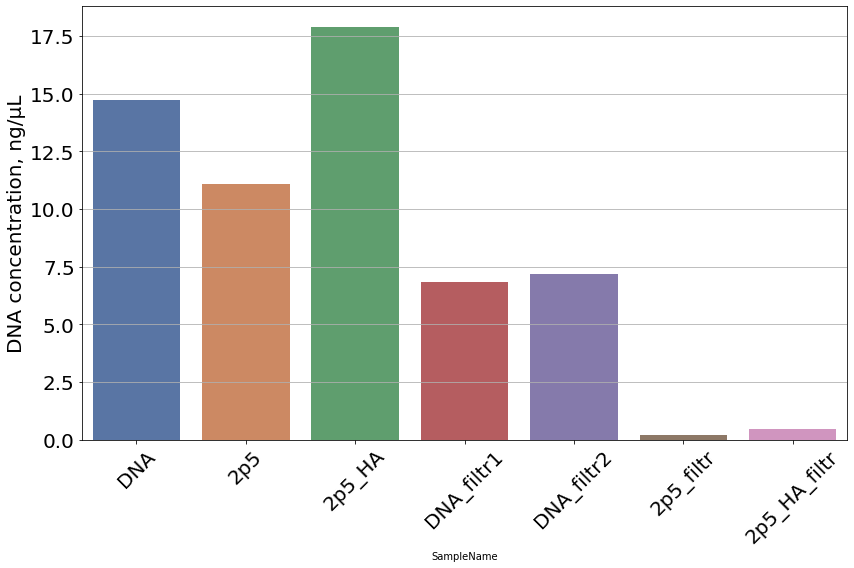

In [7]:
# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='SampleName', y='NucleicAcid(ng/uL)', data=df, palette='deep')

# Add titles and labels
plt.ylabel('DNA concentration, ng/µL', fontsize=20)

# Customize the ticks
plt.xticks(fontsize=20, rotation = 45)
plt.yticks(fontsize=20)
plt.grid(True, axis='y')
# Show the plot
plt.tight_layout()
plt.savefig('output/dna_binding.png', facecolor='white')

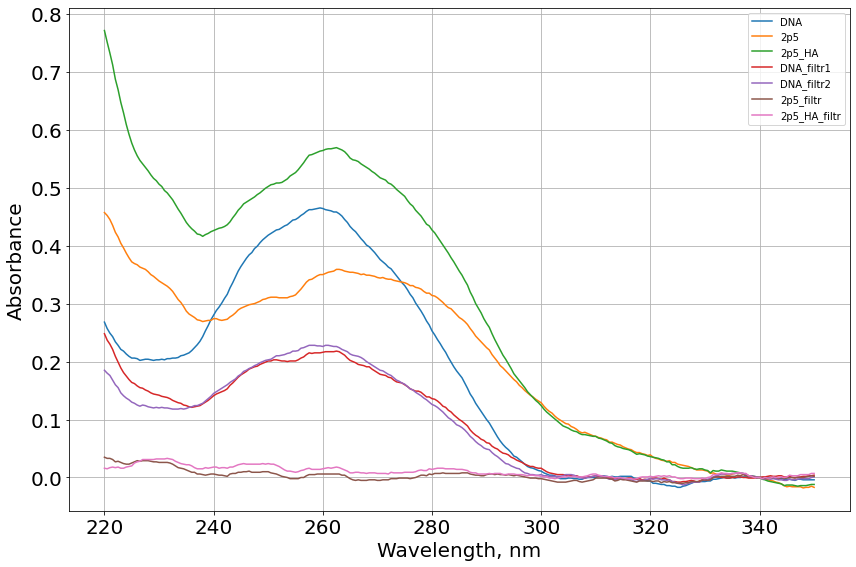

In [8]:
wavelengths = spectra_df.iloc[:, 0]
spectra = spectra_df.iloc[:, 1:]

plt.figure(figsize=(12, 8))

for column in spectra.columns:
    plt.plot(wavelengths, spectra[column], label=column)

# Customize the ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Wavelength, nm', fontsize=20)
plt.ylabel('Absorbance', fontsize=20)

plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('output/nanodrop_spectra.png', facecolor='white')

CONCLUSION:
DNA concentration decreased twice when filtered through membrane. Probably due to binding to membrane material.
In both polyplex samples free DNA content was close to zero. Absorbance spectrum of DNA in complex is different from pure DNA.

EXPERIMENT 2

In [9]:
filepath = 'nanodrop-data/nanodrop_28052024_unzipped/Oligo DNA 5_28_2024 3_33_07 PM.csv'
sample_names = ['2p5+heparin', '2p5+vitr', 'HEPES', '2p5+heparin_filtr', '2p5+vitr_filtr', 'DNA 0,04 g/L', 'H2O MQ']
spectra_file_path = 'nanodrop-data/nanodrop_28052024_unzipped/Oligo DNA 5_28_2024 3_33_07 PM_table.tsv'

In [10]:
df1 = read_nanodrop(filepath, sample_names)
df1

,Date,SampleName,NucleicAcid(ng/uL),A260/A280,A260/A230,A260,A280,NucleicAcidFactor,BaselineCorrection(nm),BaselineAbsorbance,OligoSequence
0,2024-05-28 15:33:07,2p5+heparin,16.512,1.710,1.340,0.520,0.304,31.73,340,0.088,TGGCTTGAAGATGTACTCGAT
1,2024-05-28 15:36:29,2p5+vitr,90.206,1.434,0.731,2.843,1.983,31.73,340,0.107,TGGCTTGAAGATGTACTCGAT
2,2024-05-28 15:38:09,HEPES,-0.017,-0.131,-0.456,-0.001,0.004,31.73,340,-0.029,TGGCTTGAAGATGTACTCGAT
3,2024-05-28 15:39:05,2p5+heparin_filtr,4.353,1.864,2.273,0.137,0.074,31.73,340,-0.004,TGGCTTGAAGATGTACTCGAT
4,2024-05-28 15:40:14,2p5+vitr_filtr,64.447,1.615,1.418,2.031,1.258,31.73,340,-0.006,TGGCTTGAAGATGTACTCGAT
5,2024-05-28 15:41:55,"DNA 0,04 g/L",40.075,1.800,2.370,1.263,0.702,31.73,340,-0.044,TGGCTTGAAGATGTACTCGAT
6,2024-05-28 15:42:52,H2O MQ,-0.596,2.383,0.049,-0.019,-0.008,31.73,340,-0.011,TGGCTTGAAGATGTACTCGAT


In [11]:
spectra_df1 = read_spectra(spectra_file_path, sample_names)
spectra_df1

,wavelength(nm),2p5+heparin,2p5+vitr,HEPES,2p5+heparin_filtr,2p5+vitr_filtr,"DNA 0,04 g/L",H2O MQ
0,220.0,0.57,6.814,-0.017,0.098,2.352,0.68,-1.941
1,220.5,0.551,6.646,-0.017,0.092,2.299,0.66,-1.772
2,221.0,0.539,6.483,-0.017,0.091,2.249,0.642,-1.613
3,221.5,0.527,6.318,-0.016,0.09,2.196,0.623,-1.468
4,222.0,0.51,6.145,-0.015,0.085,2.141,0.605,-1.335
...,...,...,...,...,...,...,...,...
256,348.0,-0.006,-0.006,0.003,-0.004,0.004,0.004,0.0
257,348.5,-0.005,-0.005,0.004,-0.003,0.004,0.004,0.001
258,349.0,-0.004,-0.004,0.005,-0.001,0.006,0.004,0.003
259,349.5,-0.004,-0.004,0.005,0.002,0.009,0.006,0.005


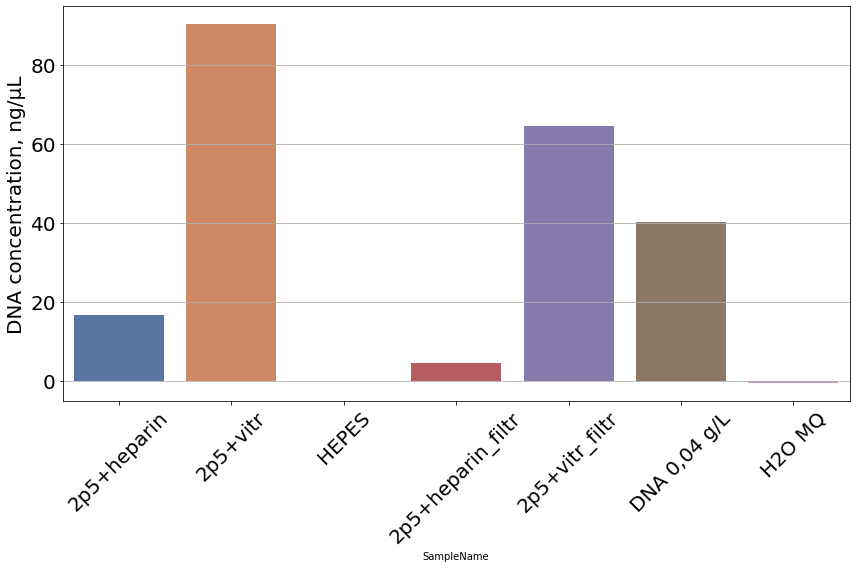

In [12]:
# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='SampleName', y='NucleicAcid(ng/uL)', data=df1, palette='deep')

# Add titles and labels
plt.ylabel('DNA concentration, ng/µL', fontsize=20)

# Customize the ticks
plt.xticks(fontsize=20, rotation = 45)
plt.yticks(fontsize=20)
plt.grid(True, axis='y')
# Show the plot
plt.tight_layout()
plt.savefig('output/dna_binding1.png', facecolor='white')

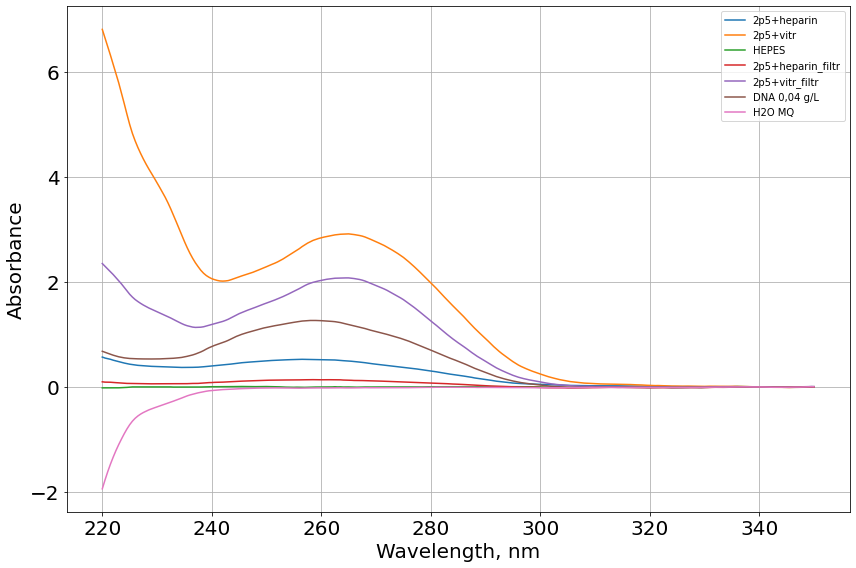

In [13]:
wavelengths = spectra_df1.iloc[:, 0]
spectra = spectra_df1.iloc[:, 1:]

plt.figure(figsize=(12, 8))

for column in spectra.columns:
    plt.plot(wavelengths, spectra[column], label=column)

# Customize the ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Wavelength, nm', fontsize=20)
plt.ylabel('Absorbance', fontsize=20)

plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('output/nanodrop_spectra1.png', facecolor='white')

CONCLUSION:
When 2p5 polyplexes were challenged with heparin, free DNA was detectable. 
In case of homogenized vitreous, absorbance values were much higher both before and after filtration. Possibly vitreous components absorb light in the same region.